# FBA QUANT Financial Engineering HW 4
KimSooWan(hse07088@snu.ac.kr)
***

In [2]:
import pandas as pd
import numpy as np


### Problem 1. 
Derive the below forward equations.

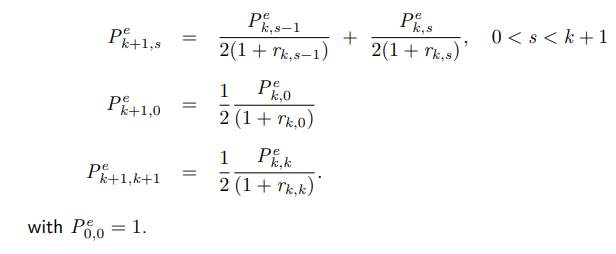

Sol)

For latice model of risk-neutral prob (q, 1-q),

The time k+1 price of a security that pays $\$$ 1 at time k+1, state s and $\$$ 0 at every other time and state is, by its definition, $\$$ 1 at state s, and $\$$ 0 at the others.

Thus, using risk-neutral pricing, time k price of same security is ${(\$1 \times (1-q) + \$0\times q)\over(1+r_{k,s})}={1-q \over (1+r_{k,s})}$ at state s, ${\$1 \times q + \$0\times (1-q) \over(1+r_{k,s-1})}={q \over (1+r_{k,s-1})}$ at state s-1, and $\$0$ at the other states. 

This can be interpreted as sum of ${1-q \over (1+r_{k,s})}$ units of a security that pays $\$$ 1 only at time k state s-1 and ${q \over (1+r_{k,s-1})}$ units of a security that pays $\$$ 1 only at time k state s-1.

Since the time 0 price of these two securities are $P_{k,s}^e$, $P_{k,s-1}^e$ each, we can obtain the follwings :

$$P_{k+1,s}^e=P_{k,s}^e{1-q \over (1+r_{k,s})}+P_{k,s-1}^e{q \over (1+r_{k,s-1})}$$

From this, assuming q=1/2, forward equation for $P_{k+1,s}^e$ is derived. Especially for s=0 and for s=k+1, since there is no state as state -1, or state k+1 at time k, two equations for $P_{k+1,0}^e$, $P_{k+1,k+1}^e$ can be induced.

$P_{0,0}^e=1$ is obvious since the security recieves $\$1$ now.

Providing more specific example,

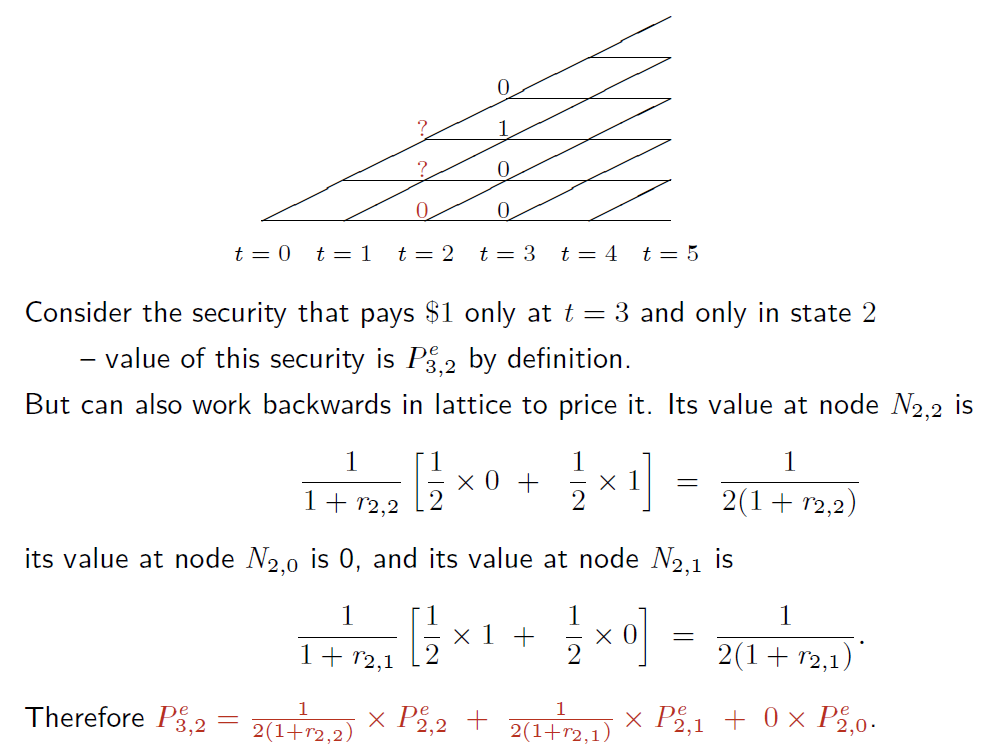
***

### Problem 2.

Use the forward equations to compute the state prices for t=0,⋯,6 in the short-rate lattice below. Now answer the following questions:

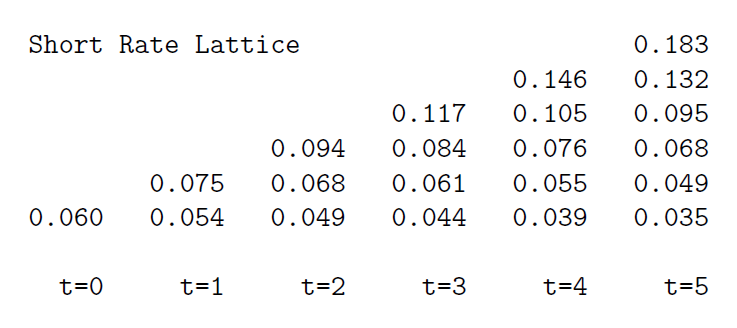

(a) Compute the price of a 4-period zero-coupon bond with face value 100 that expires at t = 4.

(b) Compute the price of a European call option on the zero-coupon bond of (a) that expires at t=2 and has strike $84

(c) Compute the price of a forward contract for delivery at t = 4 of a 2-year 10% coupon-bearing bond where we assume that delivery takes place just after a coupon has been paid.

(d) Compute the price of a caplet that expires at t = 6 with strike = 2%.

In [3]:
u=1.3
d=0.9
q=0.5
periods=6
lattice = pd.DataFrame(np.zeros((periods, periods)), columns=["t = {}".format(i) for i in range(periods)])
lattice.index.name ='state'
short_rate_lattice = lattice.copy()
short_rate_lattice.iloc[0,0]=0.07
for time in range(1, short_rate_lattice.shape[1]):
    short_rate_lattice.iloc[0, time]=short_rate_lattice.iloc[0,time-1]*d
    for state in range(1, time+1):
        short_rate_lattice.iloc[state,time]=short_rate_lattice.iloc[state-1,time-1]*u
short_rate_lattice = short_rate_lattice.round(4)
short_rate_lattice

,t = 0,t = 1,t = 2,t = 3,t = 4,t = 5
state,,,,,,
0,0.07,0.063,0.0567,0.0510,0.0459,0.0413
1,0.00,0.091,0.0819,0.0737,0.0663,0.0597
2,0.00,0.000,0.1183,0.1065,0.0958,0.0862
3,0.00,0.000,0.0000,0.1538,0.1384,0.1246
4,0.00,0.000,0.0000,0.0000,0.1999,0.1799
5,0.00,0.000,0.0000,0.0000,0.0000,0.2599


In [4]:
state_price_lattice = lattice.copy()
state_price_lattice.iloc[0,0] = 1
for time in range(1, state_price_lattice.shape[1]):
    state_price_lattice.iloc[0, time]=state_price_lattice.iloc[0,time-1]*(1-q)/(1+short_rate_lattice.iloc[0,time-1])
    for state in range(1, time):
        state_price_lattice.iloc[state,time]=state_price_lattice.iloc[state,time-1]*(1-q)/(1+short_rate_lattice.iloc[state, time-1]) + state_price_lattice.iloc[state-1,time-1]*q/(1+short_rate_lattice.iloc[state-1,time-1])
    state_price_lattice.iloc[time,time] = state_price_lattice.iloc[time-1,time-1]*q/(1+short_rate_lattice.iloc[time-1,time-1])
state_price_lattice=state_price_lattice.round(4)
state_price_lattice

,t = 0,t = 1,t = 2,t = 3,t = 4,t = 5
state,,,,,,
0,1.0,0.4673,0.2198,0.1040,0.0495,0.0237
1,0.0,0.4673,0.4340,0.3046,0.1913,0.1134
2,0.0,0.0000,0.2142,0.2963,0.2757,0.2155
3,0.0,0.0000,0.0000,0.0958,0.1754,0.2028
4,0.0,0.0000,0.0000,0.0000,0.0415,0.0943
5,0.0,0.0000,0.0000,0.0000,0.0000,0.0173


In [5]:
def compute_PV(cashflow, print_option=True):
    PV = (cashflow*state_price_lattice).sum().sum()
    if(print_option):
        print("Given cashflow")
        print(cashflow)
        print("PV : ", PV)
    return PV

In [6]:
# (a) Compute the price of a 4-period zero-coupon bond with face value 100 that expires at t = 4.

zcb_cashflow = lattice.copy()
zcb_maturity = 4
zcb_face_value = 100
zcb_cashflow.iloc[0:zcb_maturity+1,zcb_maturity] = zcb_face_value
zcbm4_PV = compute_PV(zcb_cashflow)
discount_rate_04 = zcbm4_PV/zcb_face_value

Given cashflow
       t = 0  t = 1  t = 2  t = 3  t = 4  t = 5
state                                          
0        0.0    0.0    0.0    0.0  100.0    0.0
1        0.0    0.0    0.0    0.0  100.0    0.0
2        0.0    0.0    0.0    0.0  100.0    0.0
3        0.0    0.0    0.0    0.0  100.0    0.0
4        0.0    0.0    0.0    0.0  100.0    0.0
5        0.0    0.0    0.0    0.0    0.0    0.0
PV :  73.34


In [7]:
# (b) Compute the price of a European call option on the zero-coupon bond of (a) that expires at t=2 and has strike $84

call_maturity = 2
call_strike = 84
zcb_value = zcb_cashflow.copy()
for time in range(zcb_maturity-1, call_maturity-1, -1):
    for state in range(0, time+1):
        zcb_value.iloc[state,time]= (zcb_value.iloc[state+1, time+1]*q + zcb_value.iloc[state, time+1]*(1-q))/(1+short_rate_lattice.iloc[state,time])
call_cashflow = lattice.copy()
call_cashflow.iloc[:call_maturity+1,call_maturity]=zcb_value.iloc[:call_maturity+1,call_maturity].apply(lambda x:max(x-call_strike,0))
        
call_PV = compute_PV(call_cashflow)

Given cashflow
       t = 0  t = 1     t = 2  t = 3  t = 4  t = 5
state                                             
0        0.0    0.0  5.090264    0.0    0.0    0.0
1        0.0    0.0  0.809567    0.0    0.0    0.0
2        0.0    0.0  0.000000    0.0    0.0    0.0
3        0.0    0.0  0.000000    0.0    0.0    0.0
4        0.0    0.0  0.000000    0.0    0.0    0.0
5        0.0    0.0  0.000000    0.0    0.0    0.0
PV :  1.4701922295854486


In [8]:
# (c) Compute the price of a forward contract for delivery at t = 4 of a 2-year 10% coupon-bearing bond where we assume that delivery takes place just after a coupon has been paid.

cbb_maturity = 2
cbb_delivery = 4
cbb_coupon_rate = 0.1
cbb_face_value = 100
print("Assume cbb face val", cbb_face_value)
cbb_cashflow = lattice.copy()
for time in range(cbb_delivery, cbb_delivery+cbb_maturity):
    cbb_cashflow.iloc[:time+1, time] = cbb_face_value*cbb_coupon_rate
    if(time == cbb_delivery+cbb_maturity-1):
        cbb_cashflow.iloc[:time+1, time] = cbb_cashflow.iloc[:time+1, time] + cbb_face_value
    cbb_cashflow.iloc[:time+1, time] = cbb_cashflow.iloc[:time+1, time]/(1+short_rate_lattice.iloc[:time+1, time])
foward_contract_PV=compute_PV(cbb_cashflow)
print("To make foward contract PV to 0, Forward price must be", foward_contract_PV/discount_rate_04)

Assume cbb face val 100
Given cashflow
       t = 0  t = 1  t = 2  t = 3     t = 4       t = 5
state                                                  
0        0.0    0.0    0.0    0.0  9.561144  105.637184
1        0.0    0.0    0.0    0.0  9.378224  103.802963
2        0.0    0.0    0.0    0.0  9.125753  101.270484
3        0.0    0.0    0.0    0.0  8.784259   97.812556
4        0.0    0.0    0.0    0.0  8.334028   93.228240
5        0.0    0.0    0.0    0.0  0.000000   87.308517
PV :  72.9068152424815
To make foward contract PV to 0, Forward price must be 99.4093472081831


In [9]:
# bonus) Compute the price of a future contract for delivery at t = 4 of a 2-year 10% coupon-bearing bond where we assume that delivery takes place just after a coupon has been paid.

print("Assume cbb face val", cbb_face_value)
cbb_value = cbb_cashflow.copy()
for time in range(cbb_delivery+cbb_maturity-2, -1, -1):
    for state in range(0, time+1):
        cbb_value.iloc[state, time] = cbb_value.iloc[state, time] + (0.5*cbb_value.iloc[state, time+1]+0.5*cbb_value.iloc[state+1, time+1])/(1+short_rate_lattice.iloc[state, time])
print("cbb value at each period and state is ")
print(cbb_value)

cbb_future_price = lattice.copy()
cbb_future_price.iloc[:,cbb_delivery] = cbb_value.iloc[:,cbb_delivery]
for time in range(cbb_delivery-1, -1, -1):
    for state in range(0, time+1):
        cbb_future_price.iloc[state, time] = cbb_future_price.iloc[state, time+1]*0.5+cbb_future_price.iloc[state+1, time+1]*0.5
print("\ncbb future price at each period and state is ")
print(cbb_future_price)
print("cbb future price at period 0 is", cbb_future_price.iloc[0,0])

Assume cbb face val 100
cbb value at each period and state is 
           t = 0      t = 1      t = 2       t = 3       t = 4       t = 5
state                                                                     
0      72.903049  83.815144  93.730344  102.390564  109.685509  105.637184
1       0.000000  72.197380  84.460652   95.699144  105.539458  103.802963
2       0.000000   0.000000  73.074032   87.056814   99.964884  101.270484
3       0.000000   0.000000   0.000000   76.380565   92.691846   97.812556
4       0.000000   0.000000   0.000000    0.000000   83.563945   93.228240
5       0.000000   0.000000   0.000000    0.000000    0.000000   87.308517

cbb future price at each period and state is 
           t = 0       t = 1       t = 2       t = 3       t = 4  t = 5
state                                                                  
0      99.122748  102.361297  105.182327  107.612483  109.685509    0.0
1       0.000000   95.884199   99.540268  102.752171  105.539458    0.0
2 

In [11]:
# (d) Compute the price of a caplet that expires at t = 6 with strike = 2%.

caplet_maturity = 6
caplet_strike = 0.02
caplet_payoff = lattice.copy()
caplet_payoff.iloc[:,caplet_maturity-1] = short_rate_lattice.iloc[:,caplet_maturity-1].apply(lambda x:max(x-caplet_strike, 0)/(1+x))
caplet_PV = compute_PV(caplet_payoff)
print("Note that this is PV of caplet with notional value 1")
caplet_notional_value = 100
print("Assuming notional value {}, its PV becomes {}".format(caplet_notional_value, caplet_notional_value*caplet_PV))


Given cashflow
       t = 0  t = 1  t = 2  t = 3  t = 4     t = 5
state                                             
0        0.0    0.0    0.0    0.0    0.0  0.020455
1        0.0    0.0    0.0    0.0    0.0  0.037463
2        0.0    0.0    0.0    0.0    0.0  0.060946
3        0.0    0.0    0.0    0.0    0.0  0.093011
4        0.0    0.0    0.0    0.0    0.0  0.135520
5        0.0    0.0    0.0    0.0    0.0  0.190412
PV :  0.052803353501739876
Note that this is PV of caplet with notional value 1
Assuming notional value 100, its PV becomes 5.280335350173988


***
### Problem 3.
You are given an incomplete specification of the term structure, as specified by the spot rates and forward rates noted next. You also know that the price of a 6-year bond with coupon rate 10% is $145.749 and the price of a 6-year bond with coupon rate 5% is $100.315. For all bonds, the face value is $100, and the coupons are paid annually. Assuming continuous compounding, find the missing rates.

$$s_1 = ?, s_2 = 6.9\%, s_3 = 7.5\%, s_4 = ?, s_5 = 8.4\%, s_6 = ?$$

$$f_{1,2} = 7.8\%, f_{2,3} = 8.7\%, f_{5,6} = ?, f_{1,3} = 8.25\%, f_{2,4} = 11.55\%$$

sol)

$(1+s_1)(1+f_{1,2}) = (1+s_2)^2$, thus, $s_1=6.01\%$

$(1+s_2)^2(1+f_{2,4})^2=(1+s_4)^4$, thus, $s_4=9.2\%$

By buying 2 coupon rate 5% bond and selling 1 coupon rate 10% bond, we obtain cashflow of zero coupon bond 6-year maturity with face value $100.

Therefore, its value $100.315*2-145.749=54.881$ must be equalt to $100/(1+s_6)^6$, thus, $s_6=10.52\%$

***
### Problem 4.
If $X$ follows standard normal distribution ($X\sim N(0,1)$), what is $E[X^n]$ for $n=1,2,3,4$?

sol)

For n=1, 3, due to X's symmetry, $E[X^n]=0$.

For n=2, $E[X^2]=Var(X)+E(X)^2=Var(X)=1$.

For n=4, 
$E(X^{4})=\frac{2}{\sqrt{\pi}}\int_{-\infty}^{\infty}x^{4}e^{-2x^{2}}dx=-\frac{2}{\sqrt{\pi}}x^{3}e^{-2x^{2}}\bigg\rvert_{-\infty}^{\infty}+\frac{6}{\sqrt{\pi}}\int_{-\infty}^{\infty}x^{2}e^{-2x^{2}}dx=3\big(V(X)+[E(X)]^{2}\big)=3$.